In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import torch

#from itertools import product
from pynwb import NWBHDF5IO
from nlb_tools.nwb_interface import NWBDataset

import warnings
warnings.filterwarnings("ignore")

In [15]:
 ds = NWBDataset('/home/makki/data/NWB/000070/sub-Jenkins/sub-Jenkins_ses-20090916_behavior+ecephys.nwb', split_heldout=False)

Dropping Position_Cursor due to timestamp mismatch.
Dropping Position_Eye due to timestamp mismatch.
Dropping Position_Hand due to timestamp mismatch.
Spikes found outside of observed interval.


In [1]:
trial_info = ds.trial_info
for column in trial_info.columns:
    print(column)

NameError: name 'ds' is not defined

In [19]:
print(f"Total num of trials: {len(trial_info)}\n")
print("Count of null values in each column:\n")

trial_info.isnull().sum()

Total num of trials: 2265

Count of null values in each column:



trial_id                     0
start_time                   0
end_time                     0
target_presentation_time     0
go_cue_time                  0
reaction_time                0
move_begins_time             0
move_ends_time              13
discard_trial                0
task_success                 0
trial_type                   0
trial_version                0
proto_trial                  0
maze_condition               0
correct_reach                0
maze_num_targets             0
maze_num_barriers            0
novel_maze                   0
target_positions             0
frame_details                0
hit_target_position          0
target_size                  0
barrier_info                 0
timeseries                   0
dtype: int64

In [27]:
# The make_trial_data() returns a DataFrame containing "trialized" data. It has the same fields as the continuous `dataset.data` DataFrame,
# But adds `trial_id`, `trial_time`, and `align_time`. Till here, each row is still a time bin.
# Note: Later we do the cropping and alignment around move_onset by ourselves.

trial_data = ds.make_trial_data(allow_nans=True)

for column in trial_data.columns:
    if 'spikes' not in column:
        print(column)

NaNs found in 47.14% of `trial_data`.


('Processed_A001', '0000')
('Processed_A001', '0001')
('Processed_A001', '0002')
('Processed_A001', '0003')
('Processed_A001', '0004')
('Processed_A001', '0005')
('Processed_A001', '0006')
('Processed_A001', '0007')
('Processed_A001', '0008')
('Processed_A001', '0009')
('Processed_A001', '0010')
('Processed_A001', '0011')
('Processed_A001', '0012')
('Processed_A001', '0013')
('Processed_A001', '0014')
('Processed_A001', '0015')
('Processed_A001', '0016')
('Processed_A001', '0017')
('Processed_A001', '0018')
('Processed_A001', '0019')
('Processed_A001', '0020')
('Processed_A001', '0021')
('Processed_A001', '0022')
('Processed_A001', '0023')
('Processed_A001', '0024')
('Processed_A001', '0025')
('Processed_A001', '0026')
('Processed_A001', '0027')
('Processed_A001', '0028')
('Processed_A001', '0029')
('Processed_A001', '0030')
('Processed_A001', '0031')
('Processed_A001', '0032')
('Processed_A001', '0033')
('Processed_A001', '0034')
('Processed_A001', '0035')
('Processed_A001', '0036')
(

In [30]:
trial_info['task_success'].value_counts()

1    2241
0      24
Name: task_success, dtype: int64

In [31]:
trial_info['correct_reach'].value_counts()

1    1379
0     886
Name: correct_reach, dtype: int64

In [33]:
# List of trials DataFrames
trials = [trial[1] for trial in trial_data.groupby('trial_id')]
len(trials)

2265

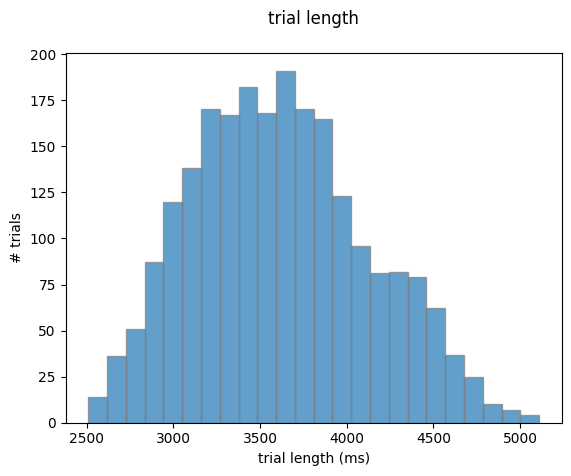

In [41]:
def plot_trial_lens(trials):
    trial_lens = []
    
    for trial_id, trial in enumerate(trials):
        trial_lens.append((trial.trial_time.values[-1] / np.timedelta64(1, 'ms')) - (trial.trial_time.values[0] / np.timedelta64(1, 'ms')))
        
    plt.hist(trial_lens, bins='auto', density=False, alpha=0.7, edgecolor='gray')
    plt.title('trial length\n')
    plt.xlabel('trial length (ms)')
    plt.ylabel('# trials')
    #plt.savefig('output_figs/tl.png')
    plt.show()
    
plot_trial_lens(trials)

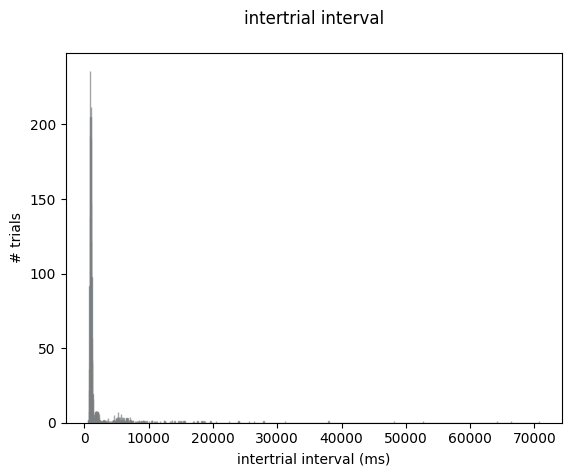

In [47]:
def plo_iti(trials, trial_info):
    itts = []
    
    for trial_id in range (len(trials)-1):
        itts.append(
            (trial_info[trial_info['trial_id'] == trial_id+1]['start_time'].values[-1] / np.timedelta64(1, 'ms')) - (trial_info[trial_info['trial_id'] == trial_id]['end_time'].values[-1] / np.timedelta64(1, 'ms'))
        )
        
    plt.hist(itts, bins='auto', density=False, alpha=0.7, edgecolor='gray')
    plt.title('intertrial interval\n')
    plt.xlabel('intertrial interval (ms)')
    plt.ylabel('# trials')
    #plt.savefig('output_figs/iit.png')
    plt.show()
    
plo_iti(trials, trial_info)

In [ ]:
def time